# MANE 6399
## Homework 3
### Solutions

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

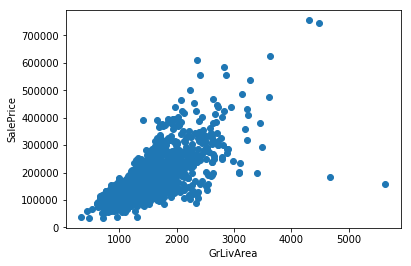

In [35]:
# Cell 2
from IPython.display import display, Math, Latex, HTML
import pandas as pd
import matplotlib.pyplot as plt
#
display(HTML("<h2> Cell 2 - Python Code for Linear Regression"))
data_set = pd.read_csv("./train.csv")
print(data_set.head())
data_set.shape
data_set.describe()
X=data_set["GrLivArea"].dropna()
Y=data_set["SalePrice"].dropna()
plt.scatter(X,Y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [36]:
# Cell 3
# enter the python code to fit a simple linear regression model using statsmodel
import statsmodels.formula.api as sm
#
display(HTML("<h2> Cell 3 - Python Code for SLR</h2>"))
model1 = sm.ols(formula='SalePrice~GrLivArea',data=data_set)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          4.52e-223
Time:                        15:14:22   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

## Cell 4

Examine the results of the Python output in cell three and comment if the y-intercept and slope terms are statistically significant.


### Regression Model

The _p_-value for a hypothesis test for the regression model is 4.25e-223 (essentially zero). Therefore, the null hypothesis that the model is not is not statistically significant can be rejected.

### Y-Intercept Term

The _t_-statistic for a test of hypothesis that the y-intercept term is zero versus not equal to zero is 4.144 and the _p_-value is 0.000. Therefore the conclusion is to reject the null hypothesis and conclude that the y-intercept term is not equal to zero.

### Slope Term

The _t_-statistic for a test of hypothesis that the slope term is zero versus not equal to zero is 38.348 and the _p_-value is 0.000. Therefore the conclusion is to reject the null hypothesis and conclude that the slope term is not equal to zero.



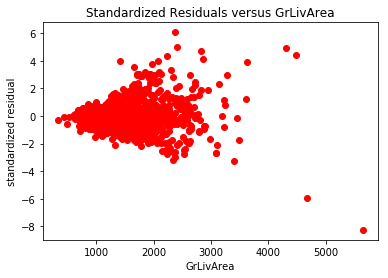

In [37]:
# Cell 5
# enter the Python code to construct and plot standardized residuals
display(HTML("<h2> Cell 5 - Standardized Residual Plot"))
residual2=fitted1.resid_pearson
plt.plot(data_set["GrLivArea"], residual2, 'ro')
plt.xlabel('GrLivArea')
plt.ylabel('standardized residual')
plt.title('Standardized Residuals versus GrLivArea')
plt.show()

## Cell 6

Examine the results of the Python output in cell five and determine if the linear regression assumptions are satisfied.

### Outliers

Since the residuals are standardized, any residuals greater that +/- 3 are outliers. There are multiple outliers

### Constant Variance

If lines are added to the residual plot along the boundary between points and blank space, a funnel pattern appears. This funnel pattern indicates that the variance is non-constant; in fact, the variance increases as the value of GrLivArea. 

Supplemental information. Non-constant variance requires a transformation of the input and output variables to remove the non-constant variance. This concept is not covered in this course.

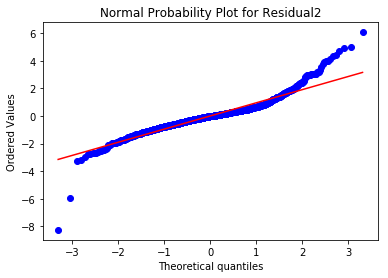

In [38]:
# Cell 7
# enter the Python code to construct a normal probability plot of the residuals
#
display(HTML("<h2>Cell 7 - Normal Probability Plot</h2>"))
from scipy import stats
# normal probability plot
stats.probplot(residual2, plot=plt)
plt.title('Normal Probability Plot for Residual2')
plt.show()

## Cell 8 - Normal Probability Plot

Examine the results of the Python output from cell seven and determine if the assumption on normally distributed residuals is valid or invalid.

### Interpretation

If the data is normally distributed, all points would fall along the red line. It is apparent that ther are outliers as well as a lack of normality. The upper-tail of the normal probability plot departs significantly from the red line.


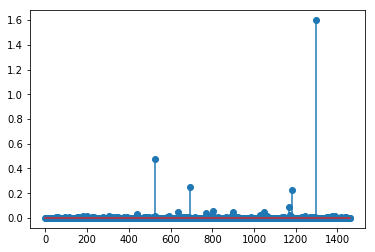

In [39]:
# Cell 9
# enter the Python code to perform an analysis of Cook's Distance
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
#
display(HTML("<h2>Cell 9 - Cook's Distance</h2>"))
#
test_class = OLSInfluence(fitted1)
plt.stem(np.arange(len(test_class.cooks_distance[0])),test_class.cooks_distance[0])
plt.show()

## Cell 10

Examine the results of the Python output from cell nine to determine if there are any influential data points in the data set.

### Rule of Thumb

One rule of thumb is to label any points with a Cook's Distance value greater than 1 as influential. In this case there is one influential point.

### Probability-based Decision

One can use F(alpha=.05,m=1,n-m=1460-1=1459)=3.84784 as the cutoff value. Under this rule, there are no influential points.

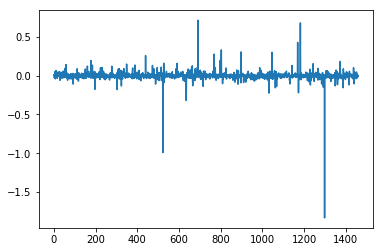

In [40]:
# Cell 11
# Enter the Python code to perform an analysis of DFFITS
#
display(HTML("<h2>Cell 11 - Python code for DFFITS</h2>"))
plt.plot(np.arange(len(test_class.dffits[0])),test_class.dffits[0])
plt.show()
dffits_df=pd.DataFrame(test_class.dffits[0])
dffits_df.to_excel('dffits.xlsx')

## Cell 12

Examine the results of the Python output from cell eleven to determine if there are any influential data points in the data set.

The criterion for identifying influential points using DFFITS is |DFFITSi|>2*sqrt(1/1460)=0.0523. The results of DFFITS were saved as dffits.xlsx. Applying the criterion to the data in the spreadsheet identifies 143 potential influential points (roughly ten percent).